In [1]:
%%HTML
<style>
    .container { width: 99%; }
</style>

In [2]:
%run 'src/timestamps.py'

create_timestamps()

In [3]:
import pandas as pd
import json

def load_dataset(file):
    return pd.read_json('datasets/' + file + '.json', lines=True)

In [4]:
dataset = load_dataset('terminal')

In [5]:
df = pd.DataFrame('', index=[0], columns=['level', 'message'])

In [6]:
df_template = df.copy()

In [7]:
%%time
for x in range(0, len(dataset)):
    if x > 0:
        df = df.append(df_template, ignore_index=True)
    df.loc[x] = pd.DataFrame(dataset[0][x], index=[0]).values[0]

CPU times: user 1.71 s, sys: 67.9 ms, total: 1.78 s
Wall time: 1.77 s


In [8]:
df['date_time'] = ''

In [9]:
for i in range(0, len(dataset)):
    df['date_time'][i] = get_timestamp(i)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [11]:
df = df.set_index(df['date_time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1902 entries, 2020-11-26 05:15:22 to 2020-11-27 12:56:22
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  1902 non-null   datetime64[ns]
 1   level      1902 non-null   object        
 2   message    1902 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 59.4+ KB


In [13]:
df

,date_time,level,message
date_time,,,
2020-11-26 05:15:22,2020-11-26 05:15:22,info,Caution: Wet floor in terminal 1 - check in area
2020-11-26 05:16:22,2020-11-26 05:16:22,info,Mr. Mueller your flight is about to depart
2020-11-26 05:17:22,2020-11-26 05:17:22,warning,Mr.Schmidt please go to your flight.
2020-11-26 05:18:22,2020-11-26 05:18:22,warning,We kindly ask all passengers to not leave thei...
2020-11-26 05:19:22,2020-11-26 05:19:22,info,The restaurant in Terminal 2 are now open
...,...,...,...
2020-11-27 12:52:22,2020-11-27 12:52:22,info,Mr. Mueller your flight is about to depart
2020-11-27 12:53:22,2020-11-27 12:53:22,info,Welcome to the airport
2020-11-27 12:54:22,2020-11-27 12:54:22,info,Caution: Wet floor in terminal 1 - check in area


In [14]:
df.describe(datetime_is_numeric=True)

,date_time
count,1902
mean,2020-11-26 21:05:52.000000256
min,2020-11-26 05:15:22
25%,2020-11-26 13:10:37
50%,2020-11-26 21:05:52
75%,2020-11-27 05:01:07
max,2020-11-27 12:56:22


In [15]:
df['level'].describe()

count     1902
unique       2
top       info
freq      1051
Name: level, dtype: object

In [16]:
pt_level = df.pivot_table(index=['level'], aggfunc='size')
pt_level

level
info       1051
warning     851
dtype: int64

<AxesSubplot:ylabel='level'>

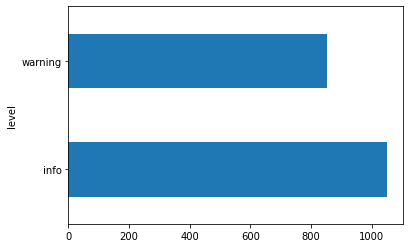

In [17]:
pt_level.plot.barh()

In [18]:
df['message'].describe()

count                                                  1902
unique                                                    7
top       We kindly ask all passengers to not leave thei...
freq                                                    297
Name: message, dtype: object

In [19]:
pt_message = df.pivot_table(index=['message'], aggfunc='size')
pt_message

message
Caution: Wet floor in terminal 1 - check in area                     268
Mr. Mueller your flight is about to depart                           269
Mr.Schmidt please go to your flight.                                 281
Please wear your masks in the terminal and keep distance             273
The restaurant in Terminal 2 are now open                            272
We kindly ask all passengers to not leave their baggage unatteded    297
Welcome to the airport                                               242
dtype: int64

<AxesSubplot:ylabel='message'>

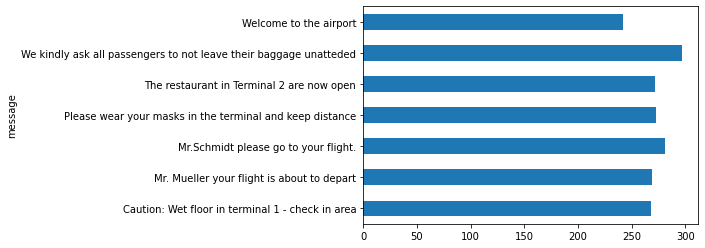

In [20]:
pt_message.plot.barh()